In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [17]:
df=pd.read_csv("./train.csv")


In [40]:
train_x=df['text'][:6000]
train_y=np.array(df['target'][:6000])
val_x=df['text'][6000:]
val_y=np.array(df['target'][6000:])

#print(train_x[1:5],"\n",train_y[1:5],"\n",test_x[1:5],"\n",test_y[1:5])


In [41]:
vocab_size=20000
embedding_dim=64
max_length=120
trunc_type='post'
oov_token="<OOV>"

In [42]:
tokenizer = Tokenizer(vocab_size,oov_token)
tokenizer.fit_on_texts(train_x)
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_x)
padded = pad_sequences(sequences, maxlen=max_length,truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(val_x)
test_padded = pad_sequences(test_seq, maxlen=max_length,truncating=trunc_type)

In [43]:
from keras.regularizers import l1
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
import matplotlib.pyplot as plt
# instantiate regularizer
reg = l1(0.005)

In [44]:
model = tf.keras.Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    GlobalAveragePooling1D(),
    Dropout(0.2,input_shape=(64,)),
    Dense(64,activation='relu',kernel_initializer='glorot_normal',activity_regularizer=reg),
    Dropout(0.2,input_shape=(32,)),
    Dense(32,activation='relu',kernel_initializer='glorot_normal',activity_regularizer=reg),
    
    Dense(1,activation='sigmoid',kernel_initializer='glorot_normal',activity_regularizer=reg)
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 64)           1280000   
_________________________________________________________________
global_average_pooling1d_9 ( (None, 64)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [45]:

num_epochs=10
history=model.fit(padded,train_y,epochs=num_epochs,validation_data=(test_padded,val_y),batch_size=32)


Train on 6000 samples, validate on 1613 samples
Epoch 1/10
6000/6000 [==============================] - 4s 744us/sample - loss: 0.6868 - accuracy: 0.5805 - val_loss: 0.6926 - val_accuracy: 0.5325
Epoch 2/10
6000/6000 [==============================] - 3s 536us/sample - loss: 0.6072 - accuracy: 0.6823 - val_loss: 0.5815 - val_accuracy: 0.6987
Epoch 3/10
6000/6000 [==============================] - 3s 572us/sample - loss: 0.4074 - accuracy: 0.8428 - val_loss: 0.5467 - val_accuracy: 0.7433
Epoch 4/10
6000/6000 [==============================] - 3s 565us/sample - loss: 0.3009 - accuracy: 0.8948 - val_loss: 0.5216 - val_accuracy: 0.7737
Epoch 5/10
6000/6000 [==============================] - 4s 594us/sample - loss: 0.2217 - accuracy: 0.9325 - val_loss: 0.5624 - val_accuracy: 0.7607
Epoch 6/10
6000/6000 [==============================] - 3s 561us/sample - loss: 0.1751 - accuracy: 0.9498 - val_loss: 0.6792 - val_accuracy: 0.7111
Epoch 7/10
6000/6000 [==============================] - 3s 544us

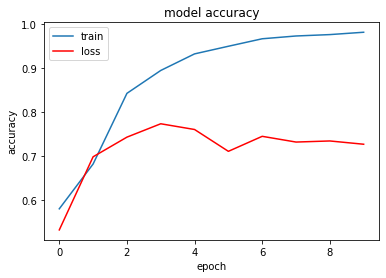

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='r')
#plt.plot(history.history['loss'],color='r')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train', 'loss'], loc='upper left')